<font size = '5'> **Bayesian Decision Models: A Primer** </font>

url - https://doi-org.udel.idm.oclc.org/10.1016/j.neuron.2019.09.037

<font size = '3'> **3.1 Case 1: Unequal Likelihoods and Gestalt Laws** </font>

**a)** 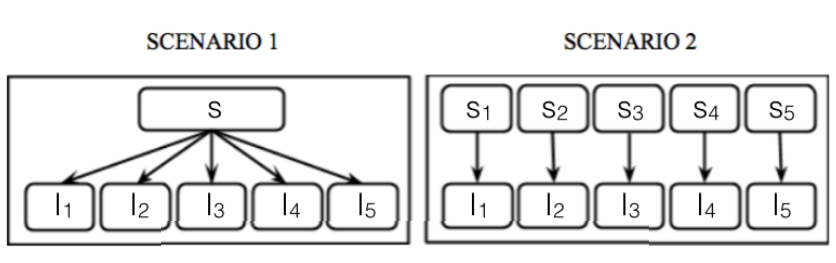

**b)** likelihood of scenario 1 - $\frac{1}{2}$

**c)** likelihood of scenario 2 - $\frac{1}{2}.\frac{1}{2}.\frac{1}{2}.\frac{1}{2}.\frac{1}{2} = \frac{1}{32}$

**d)** The likelihoods of the scenarios do not add up to one. This is because the likelihood in each case is only considering the probability under one scenario. 

**e)** 

**f)** prior 1 - $\frac{2}{3}$  

prior 2 - $\frac{1}{3}$

**g)** likelihood 1 * prior 1 = $\frac{1}{3}$

   likelihood 2 * prior 2 = $\frac{1}{3} . \frac{1}{32} = \frac{1}{96}$
   
**h)** sum of the two posteriors = $\frac{1}{3} + \frac{1}{96}$

   posterior of scenario 1 - $\frac{\frac{1}{3}}{\frac{1}{3} + \frac{1}{96}}$ = 0.97
   
   posterior of scenario 2 - $\frac{\frac{1}{96}}{\frac{1}{3} + \frac{1}{96}}$ = 0.03
   
**k)** Gesalts law of common fate says that the mind has a tendency to group the dots together. According to the bayes rule the posterior of the scenario 1 has a higher probability. So the answer agrees with gesalts law of common fate. 

**l)** 

<font size = '3'> **3.2 - Case 2: Competing Likelihoods and Priors in Motion Sickness** </font>


**a)**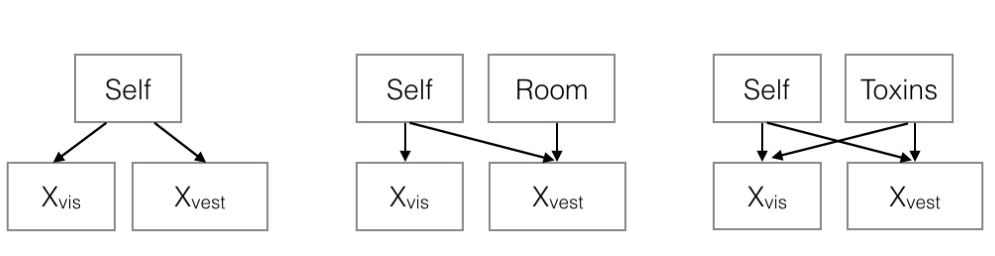

**b)** In scenario 1 you have a high probability that the sickness is caused by a prior for ingest toxins because your observations are solely based on your movement. 
       In scenario 2 you have a low prior probability for ingest toxins than scenario 1 because this time the vestibular observations are caused by both your motion and the motion of the room.
       

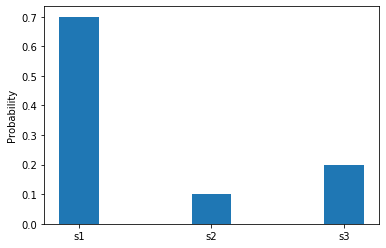

In [1]:
import matplotlib.pyplot as plt

plt.bar(['s1', 's2', 's3'], [0.7, 0.1, 0.2], width = 0.3)
plt.ylabel('Probability')
plt.show()


**c)**

<font size = '3'> **3.3 Case 3: Ambiguity Due to a Nuisance Parameter in Color Vision** </font>

Generative model - 
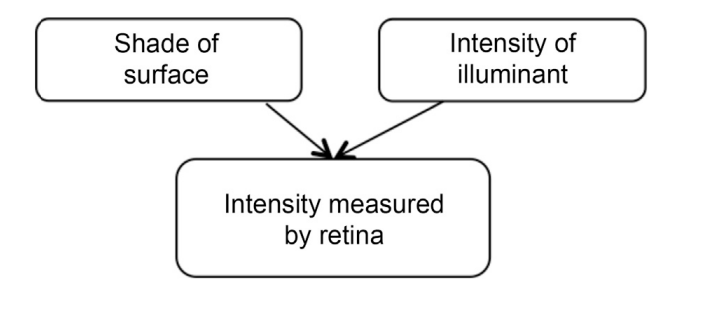

<u>Shade of surface</u> is the proportion of incident light that is reflected. (e.g black might have a shade of surface of 0.1. white might have a shade of surface of 0.9)

<u>Intensity of illumanati</u> is the amount of light it emits. 

Shade and intensity are the world states and the observation is the intensity measured by the retina. 

retinal intensity = surface shade x light intensity

**a)**

In [2]:
from sympy import *
import numpy as np

#import symbols
r, s, l = symbols('r s l')

#equation of retinal intensity 
eq1 = Eq(r, s*l)

#solve for s
eq2 = Eq(s, solve(eq1, s)[0])

#find the surface shading for r =  0.2 and l = 1
print('The surface shading: ')
eq2.subs([(r,0.2), (l, 1)])

The surface shading: 


Eq(s, 0.2)

**b)**

In [3]:
#when r = 0.2 and l = 0.1
print('The surface shading: ')
eq2.subs([(r, 0.2), (l, 0.4)])

The surface shading: 


Eq(s, 0.5)

**c)** You can get a constant retinal intensity by a multiple different surface shading and light intensity value. For example you can get a retinal intensity of 0.2 by a very bright light (l = 1) and a dark surface (s = 0.2) or a different way. (a moderate light intensity, l = 0.4, and a moderate surface shading 0.5). In this occasion the retinal intensity provides ambigous information about the surface shade. 

**d)**

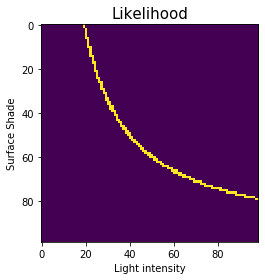

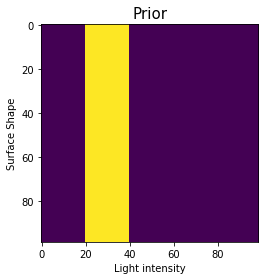

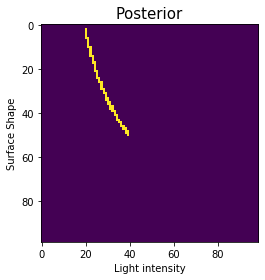

In [4]:
light_int = np.arange(0.01, 1, 0.01)

ss = []
li = []

for i in light_int:
    ss.append(0.2/i)
    li.append(i) 


#create a likelihood matrix
like_mat = np.zeros([len(li), len(li)])

light_int = np.tile(li, len(li)).reshape([len(li), len(li)])

for row in range(len(like_mat)):
    for col in range(len(like_mat)):
        
        val = li[len(like_mat) - 1 - row] * light_int[row, col]
        val = np.round(val, 2)
        if val == 0.2:
            like_mat[row, col] = val

plt.figure(figsize = (4,4))
plt.imshow(like_mat)
plt.xlabel('Light intensity')
plt.ylabel('Surface Shade')
plt.title('Likelihood', fontsize = 15)
plt.tight_layout()
plt.show()

#create a prior

prior_mat = np.zeros([len(like_mat), len(like_mat)])
prior_mat[:,20:40] = 1

plt.figure(figsize = (4,4))
plt.imshow(prior_mat)
plt.xlabel('Light intensity')
plt.ylabel('Surface Shape')
plt.title('Prior', fontsize = 15)
plt.show()


#create the posterior matrix
post_mat = prior_mat * like_mat

plt.figure(figsize = (4,4))
plt.xlabel('Light intensity')
plt.ylabel('Surface Shape')
plt.imshow(post_mat)
plt.title('Posterior', fontsize = 15)
plt.show()

**e)** The likelihood curve represents the light intensity and surface shade values that gives a retinal intensity value of 0.2. There are multiple values the light intensity and surface shade can take in order to produce 0.2. The curve in the likelihood represent these values. 

**f)**

**g)** 


**h)** According to the bayesian theory one would percieve a surface shade somewhere between 0 and 0.5 (intensity). A person would have a tendancy to percieve a darker suraface.

<font size = '3'> **3.4 Case 4: Inference under Mesurement Noise in Sound Localization** </font>

**a)** Because the posterior probability depends only on the stimulus(s) every other states are irrelavent to calculate the posterior distribution. The posterior distribution depends on the prior and the likelihood which are based on the stimulus (s).

**b)**

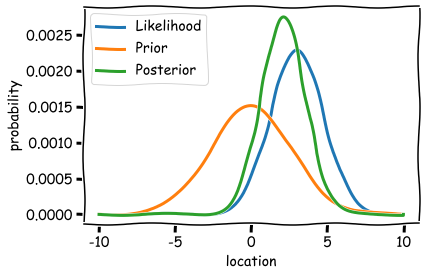

In [19]:
def my_gaussian(sigma, mu,x):
    
    gaussian = 1/(np.sqrt(sigma*2*np.pi))*np.exp(-1/2*(x - mu)**2/sigma)
        
    return gaussian

x = np.arange(-10,10,0.01)

#likelihood
mu_like = 3
sigma_like = 3
likelihood = my_gaussian(sigma_like, mu_like, x)

#prior
mu_p = 0
sigma_p = 7
prior = my_gaussian(sigma_p, mu_p, x)

#posterior
post = likelihood * prior

plt.xkcd()
plt.figure(figsize = (6,4))
plt.xlabel('location')
plt.ylabel('probability')
plt.plot(x, likelihood/np.sum(likelihood), linewidth = 3, label = 'Likelihood')
plt.plot(x, prior/np.sum(prior), linewidth = 3, label = 'Prior')
plt.plot(x, post/np.sum(post), linewidth = 3, label = 'Posterior')
plt.legend()
plt.show()

In [16]:
mu_posterior = (mu_like + mu_prior)

434.1490786135172

**c)**

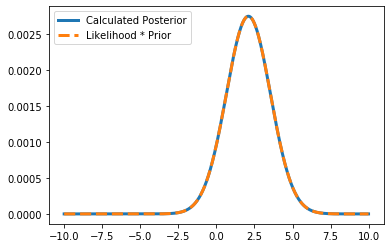

In [6]:
#mathematically calculated posterior
mu_post = (mu_like/sigma_like + mu_p/sigma_p)/(1/sigma_like + 1/sigma_p)
sigma_post = 1/(1/sigma_like + 1/sigma_p)
posterior_calc = my_gaussian(sigma_post, mu_post, x)

#plot the posteriors
plt.figure(figsize = (6,4))
plt.plot(x, posterior_calc/np.sum(posterior_calc), linewidth = 3, label = 'Calculated Posterior')
plt.plot(x, post/np.sum(post), linewidth = 3, linestyle = '--', label = 'Likelihood * Prior')
plt.legend()
plt.show()

**d)** Let <font size = '3'> $\sigma = \sigma_{s}$ </font>

then <font size = '3'> $\frac{\frac{1}{\sigma^2}}{\frac{1}{\sigma^2}+\frac{1}{\sigma^2}} = \frac{1}{2}$ </font>

<font size = '3'> $\mu_{post} = \frac{x_{trial}}{2} + \frac{mu}{2}$ </font>

**e)** <font size = '5'> $\frac{1}{\frac{1}{\sigma^2} + \frac{1}{\sigma_{s}^2}} = \frac{1}{\frac{\sigma^2_{s} + \sigma^2}{{\sigma^2 \sigma_{s}^2}}} = \frac{\sigma^2 \sigma_{s}^2}{\sigma^2_{s} + \sigma^2}$ </font>

**f)**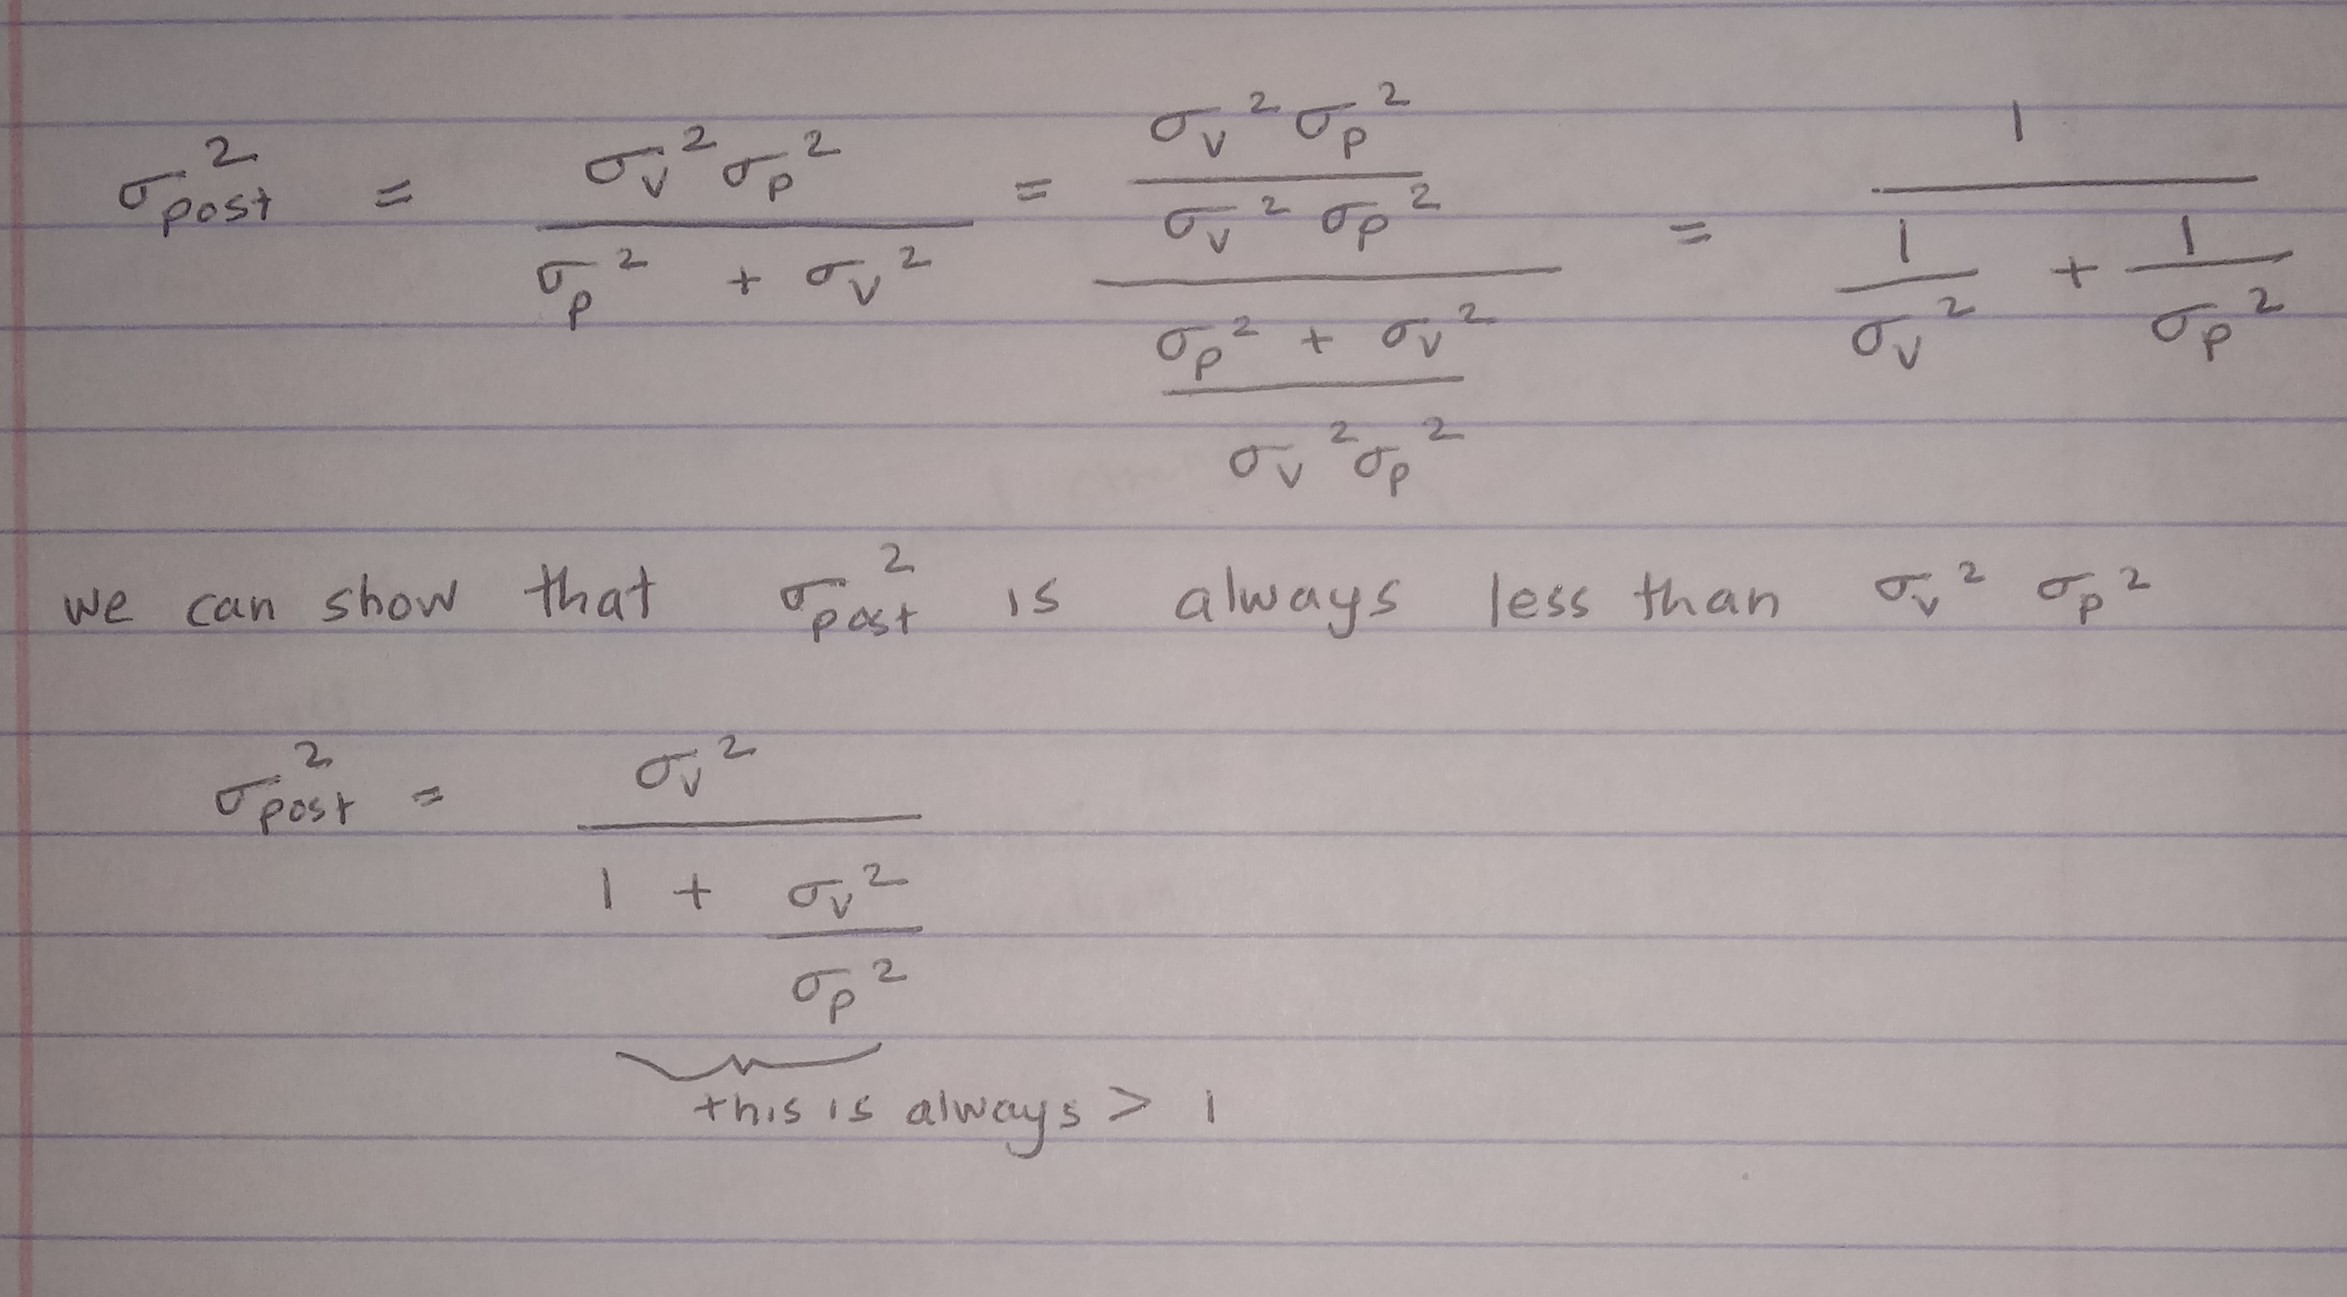


**g)** <font size = '4'> $\frac{\sigma^2}{2}$ </font>


**h)**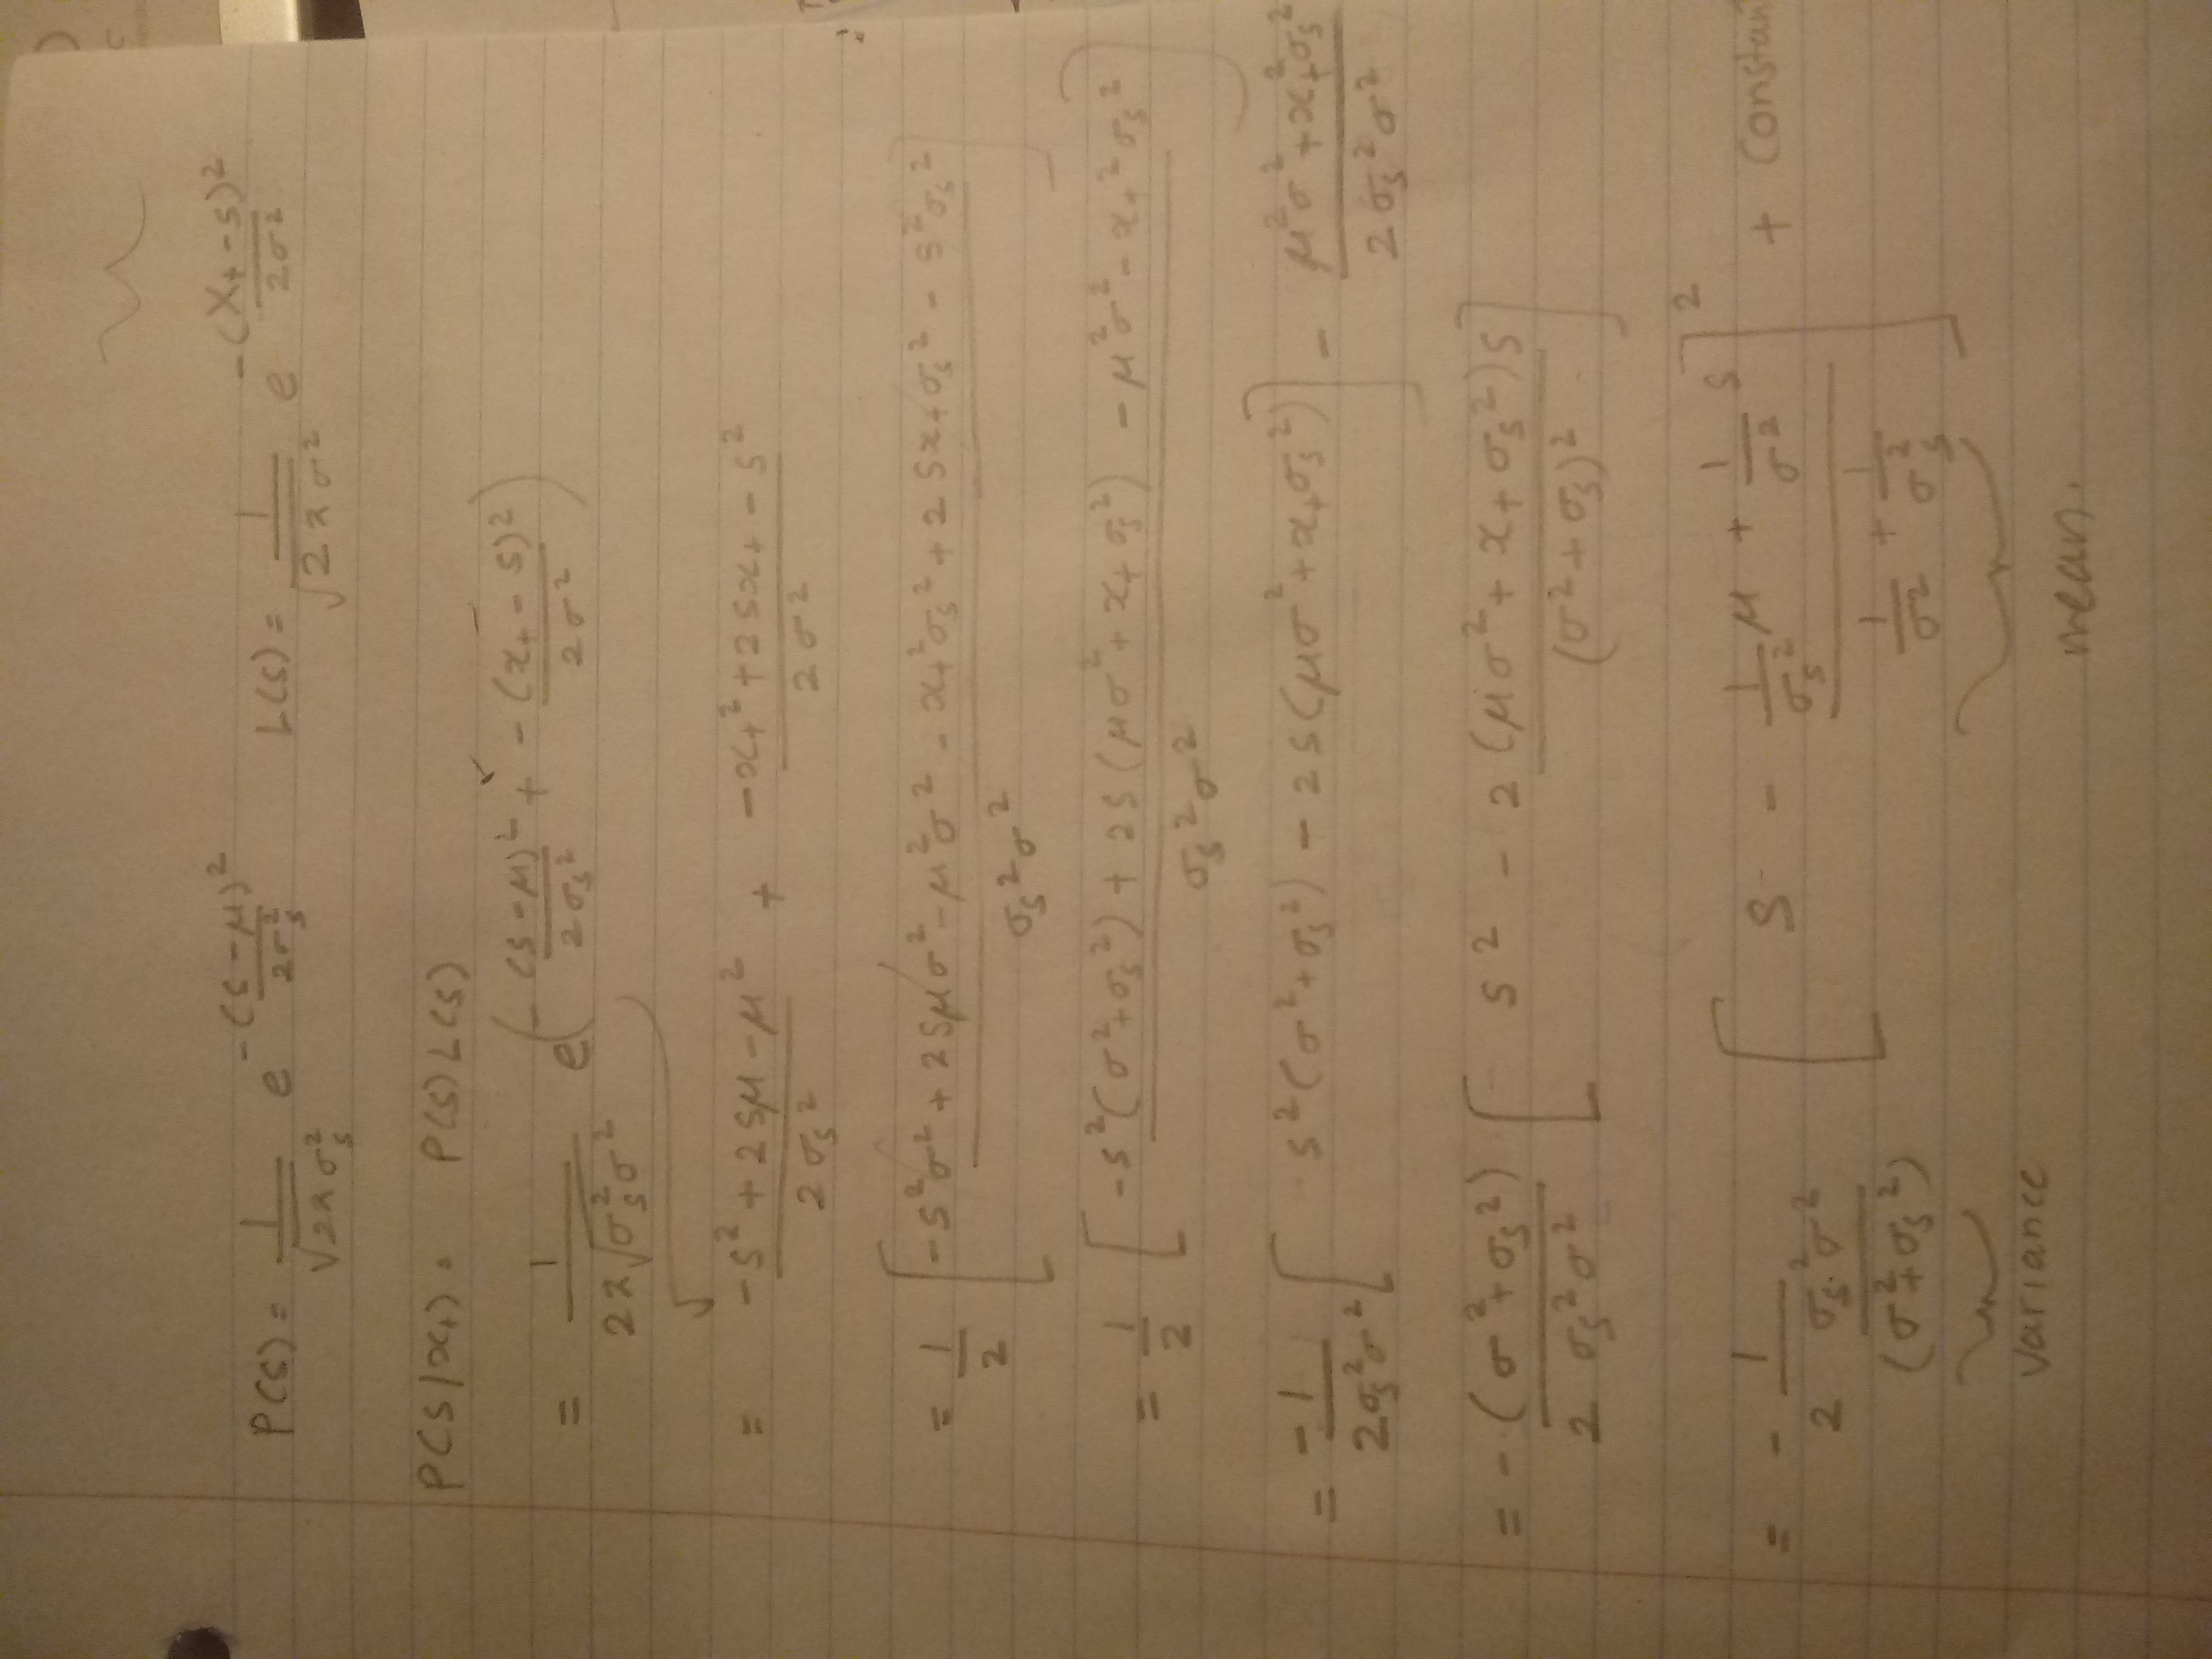


<font size = '3'> **Case 5: Hierarchical Inference in Change Point Detection** </font>

**a)** That $a$ is independent of $t_{change}$

**b)**

**c)** 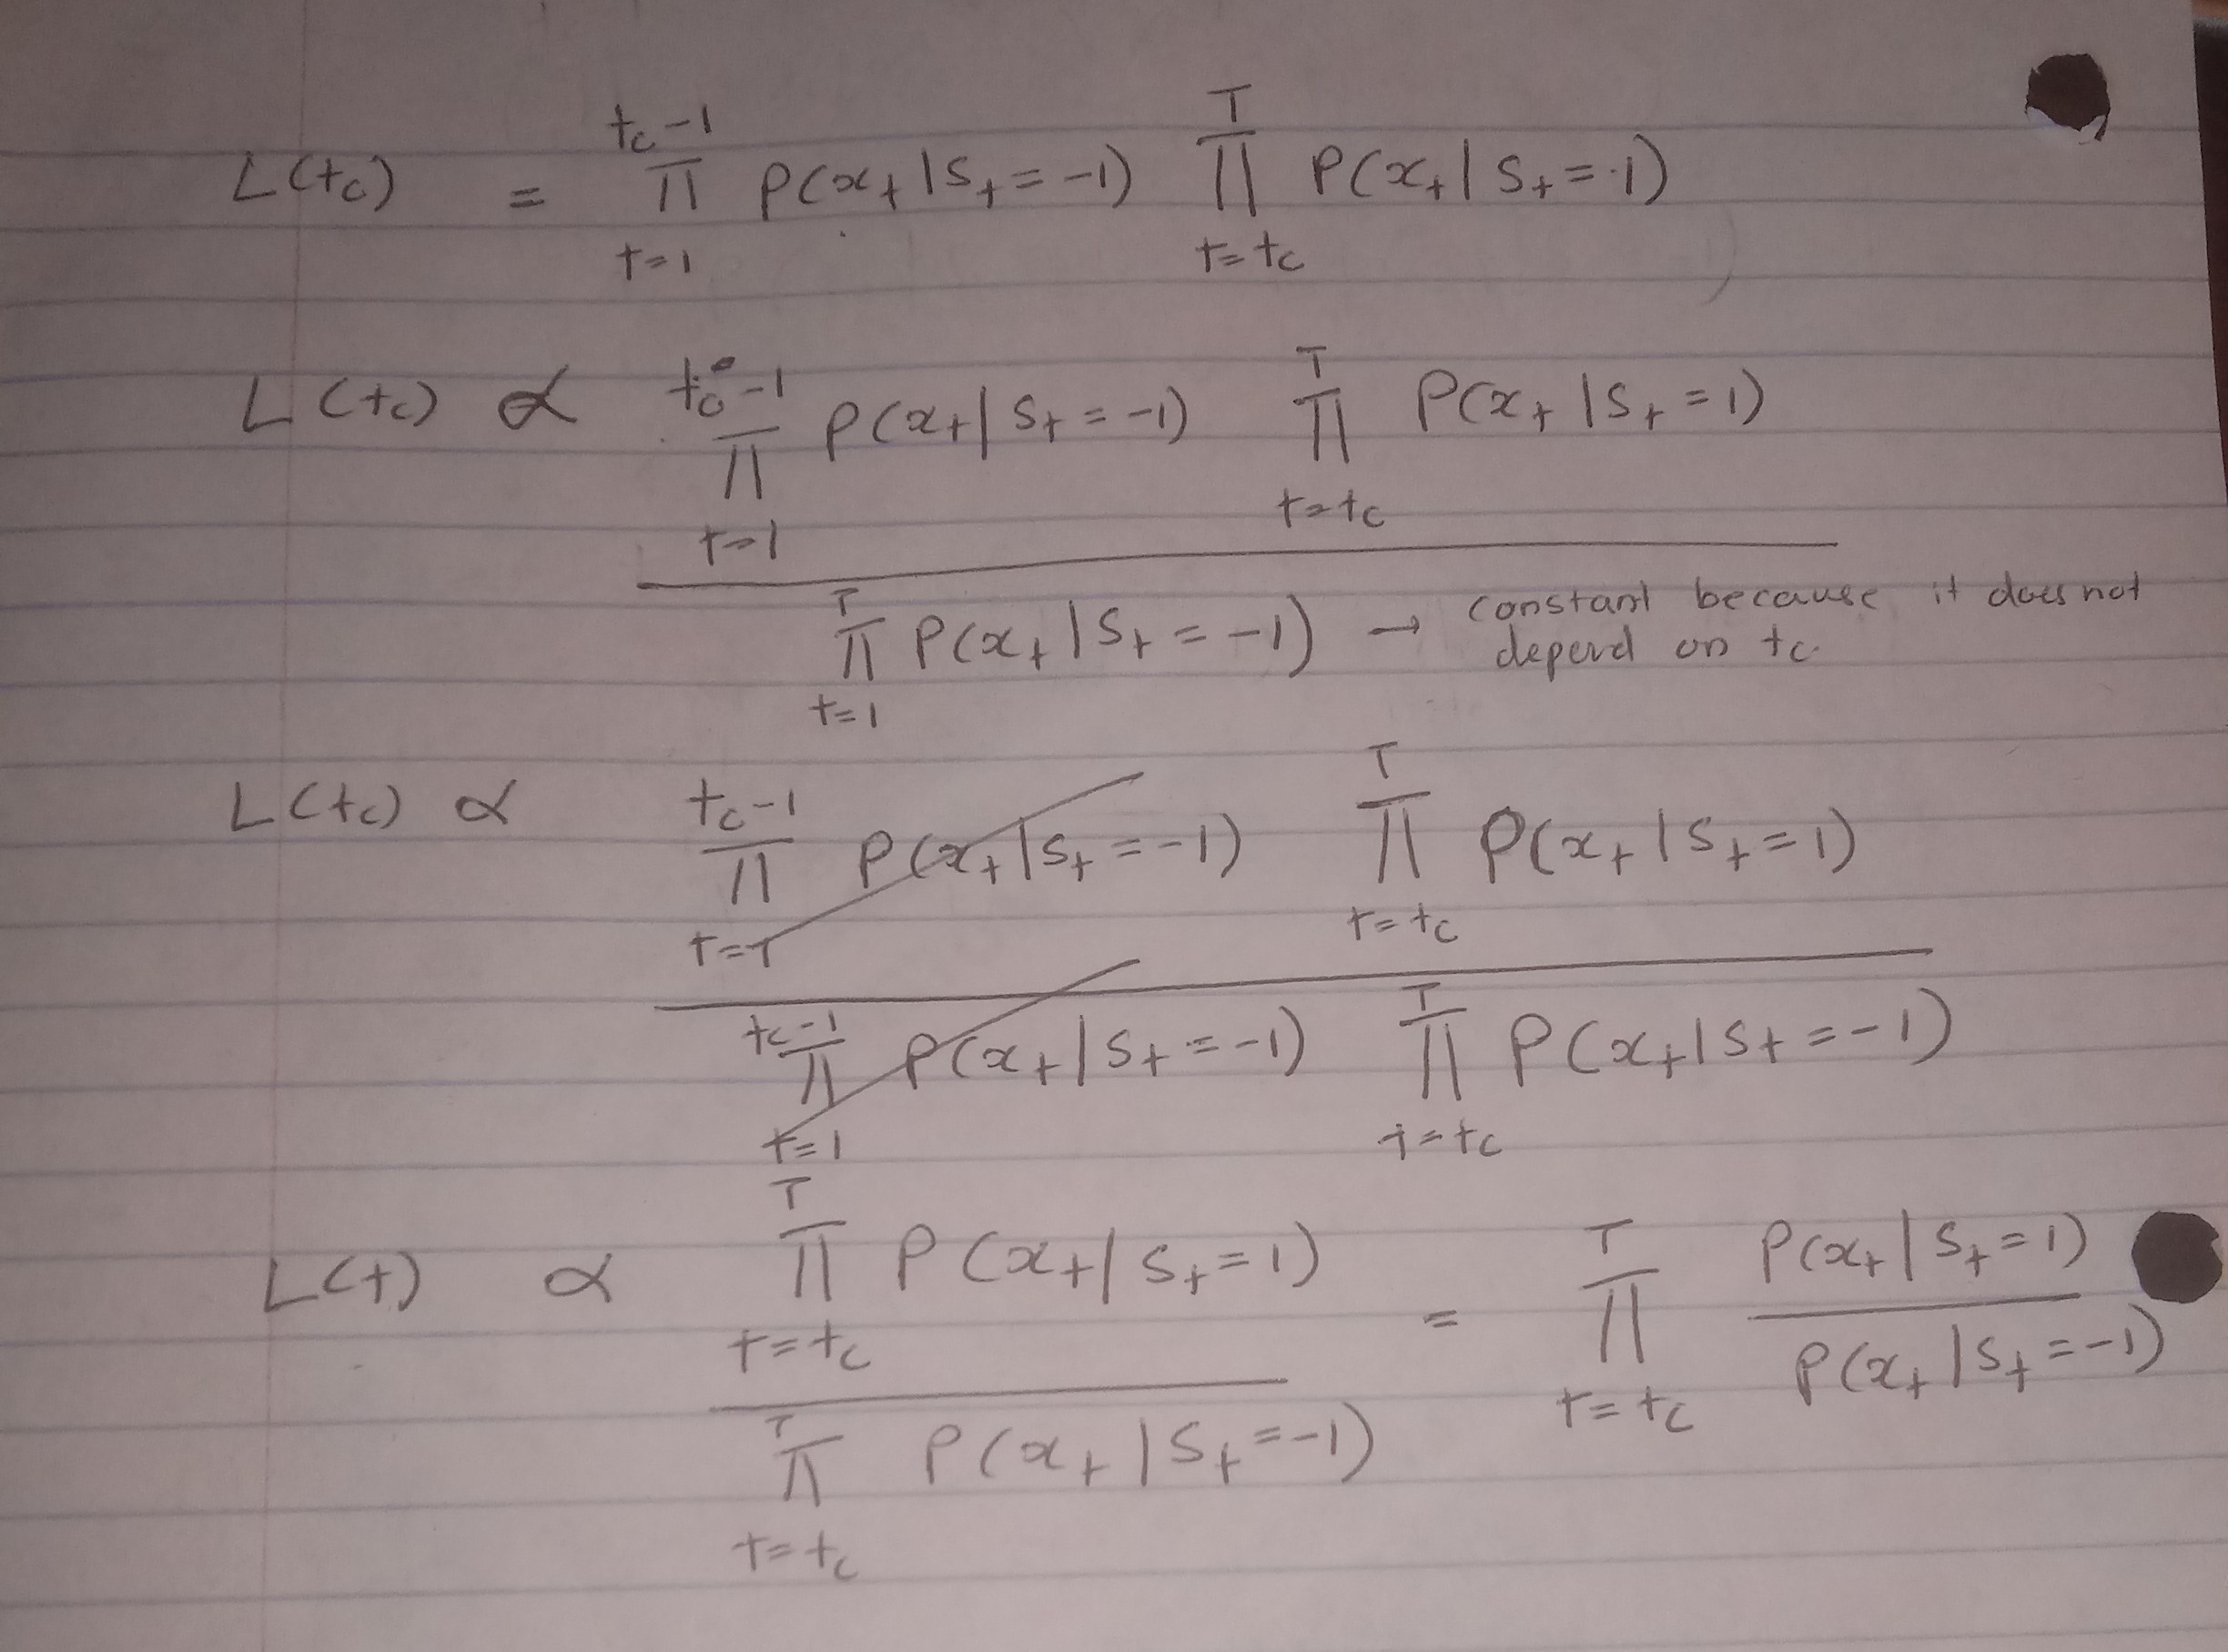

**d)**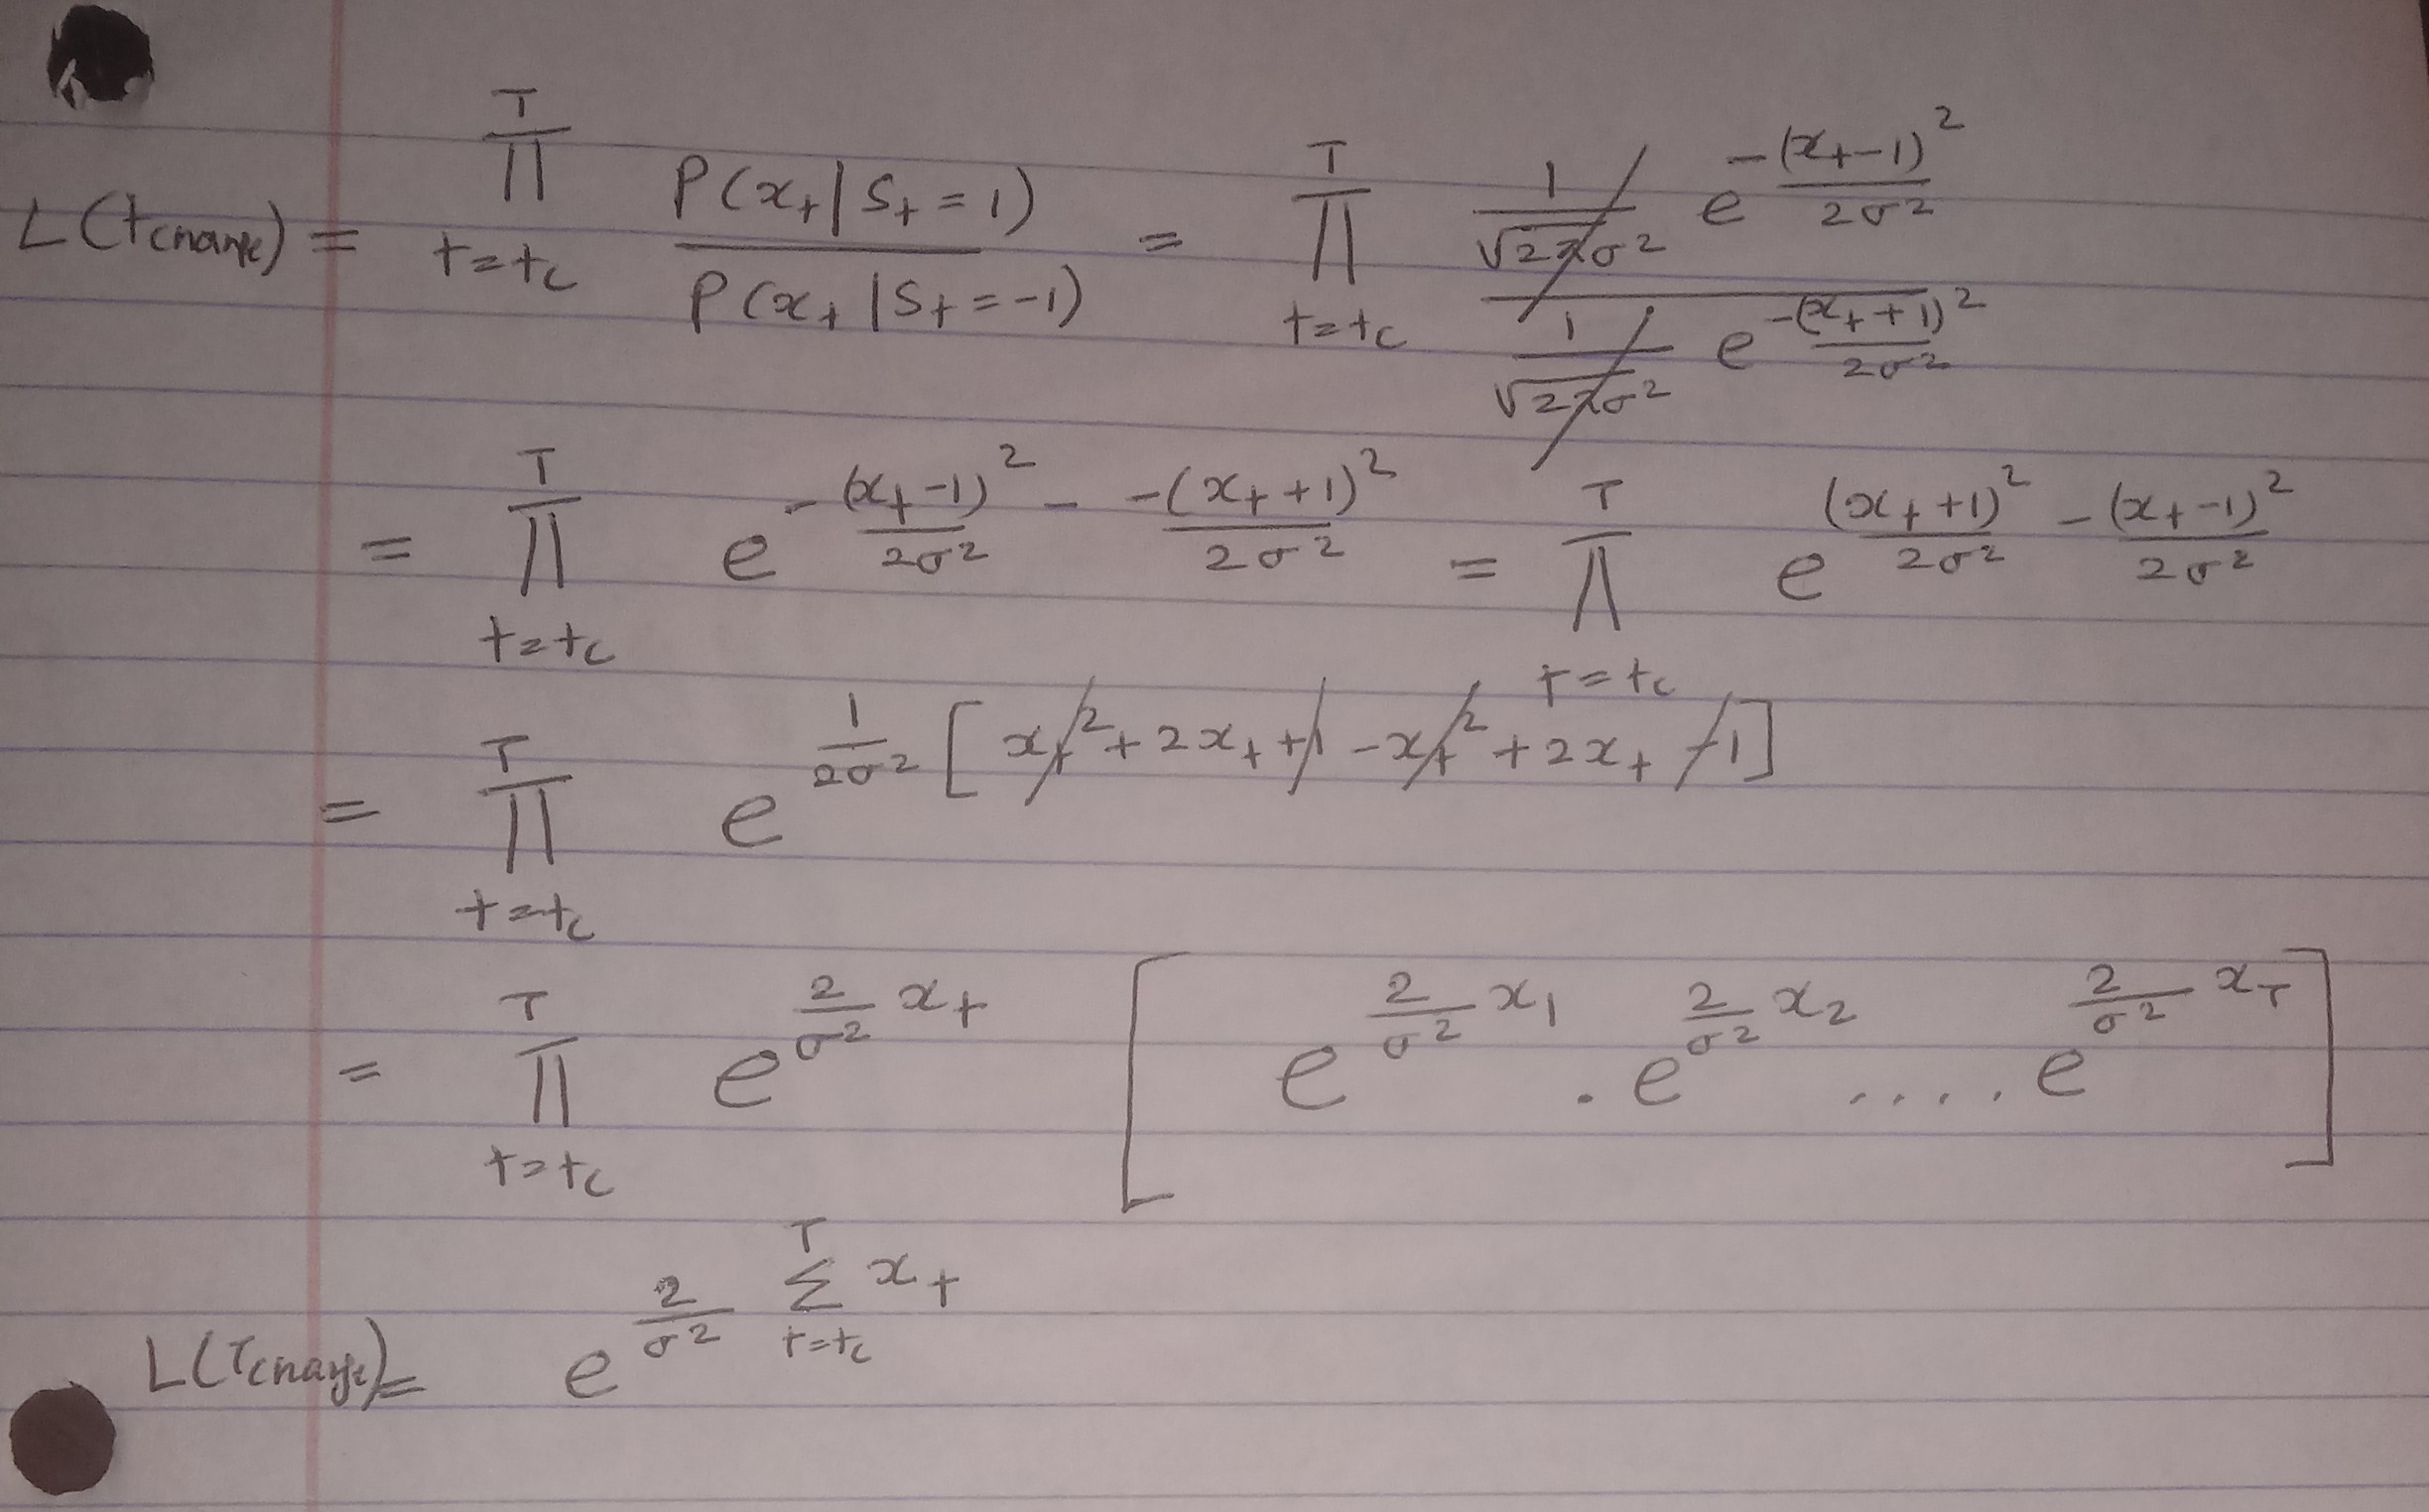

**f)**

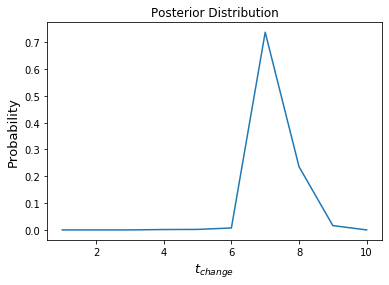

In [7]:
#sigma, x and time
sigma = 1
x = np.array([-0.46, 0.83, -3.26, -0.14, -0.68, -2.31, 0.57, 1.34, 4.58, 3.77])
t = np.arange(1, 11)

#create an empty list to append the values
p = []

for i in range(1,11):  
    
    p.append(np.exp(2/sigma* np.sum(x[i-1:10])))

p = p/np.sum(p)

#plot
plt.plot(t, p)
plt.xlabel('$t_{change}$', fontsize = 13)
plt.ylabel('Probability', fontsize = 13)
plt.title('Posterior Distribution')
plt.show()

**g)** Normalizing would make the value between 0 and 1. Goal is to find the $t$ point that has the maximum value. So you don't have to normalize the result to find the maximum $t_{change}$

**h)** If you cumulatively add the x values starting from T to t = 1 you will be adding the positive values at first. When you pass the change point the x values start to become negative and the cumulative sum starts to get lower. So the peak of the cumulative sum is the change point. 

In [8]:
#simulate trials
def sim(pos):
    #this function simulates the values given the t_change position
    s_n = np.abs(np.random.rand(pos))*-3 + np.abs(np.random.rand(pos))
    s_p = np.abs(np.random.rand(10 - pos))*3 - np.abs(np.random.rand(10 - pos))
    
    return np.concatenate((s_n, s_p), axis = 0)

#function to find the max probability

def prob_tc(x):
    
    p = []

    for i in range(1,11):  

        p.append(np.exp(2/sigma* np.sum(x[i-1:10])))

    p = p/np.sum(p)
    return p


#the number of trials to simulate
ntrials = 10000
XX = []

for i in range(0,10):
    xx = []  
    for k in range(0,ntrials):
        
        xx.append(sim(i))
    
    XX.append(xx)
        
X = np.concatenate(XX)


#see how many change points are correctly found
correct_perc = []


trials1 = X[0:ntrials]
trials2 = X[ntrials:2*ntrials]
trials3 = X[2*ntrials:3*ntrials]
trials4 = X[3*ntrials:4*ntrials]
trials5 = X[4*ntrials:5*ntrials]
trials6 = X[5*ntrials:6*ntrials]
trials7 = X[6*ntrials:7*ntrials]
trials8 = X[7*ntrials:8*ntrials]
trials9 = X[8*ntrials:9*ntrials]
trials10 = X[9*ntrials:10*ntrials]

trial_all = [trials1, trials2, trials3, trials4, trials5, trials6, trials7, trials8, trials9, trials10]
count = 0

for t in trial_all:
    correct_pred = []
    
    for r in range(ntrials):
        
        if np.argmax(prob_tc(t[r])) == count:
            
            correct_pred.append(1)
            
    count += 1    
    correct_perc.append(np.sum(correct_pred)/ntrials)

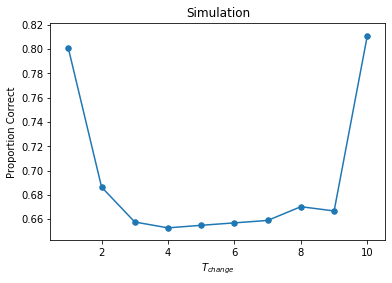

In [11]:
plt.title('Simulation')
plt.plot(range(1,11), correct_perc)
plt.scatter(range(1,11), correct_perc, s = 30)
plt.xlabel('$T_{change}$')
plt.ylabel('Proportion Correct')
plt.show()

**j)**

In [12]:
print('Mean of the correct percentage values', np.round(np.mean(correct_perc), 2))

Mean of the correct percentage values 0.69


**k)**

In [37]:
#simulate trials
sigmas = [1,2,3]

def sim(pos):
    #this function simulates the values given the t_change position
    s_n = np.abs(np.random.rand(pos))*-3 + np.abs(np.random.rand(pos))
    s_p = np.abs(np.random.rand(16 - pos))*3 - np.abs(np.random.rand(16 - pos))
    
    return np.concatenate((s_n, s_p), axis = 0)

#function to find the max probability

def prob_tc(x, sigma):
    
    p = []
    arr = np.array([2,4,6,8,10,12,14,16])
    
    for i in arr:  

        p.append(np.exp(2/sigma* np.sum(x[i-1::2])))

    p = p/np.sum(p)
    return p


#the number of trials to simulate
ntrials = 1000
XX = []

for i in range(0,16):
    xx = []  
    for k in range(0,ntrials):
        
        xx.append(sim(i))
    
    XX.append(xx)
        
X = np.concatenate(XX)


#see how many change points are correctly found


trials2 = X[0:ntrials]
trials4 = X[ntrials:2*ntrials]
trials6 = X[2*ntrials:3*ntrials]
trials8 = X[3*ntrials:4*ntrials]
trials10 = X[4*ntrials:5*ntrials]
trials12 = X[5*ntrials:6*ntrials]
trials14 = X[6*ntrials:7*ntrials]
trials16 = X[7*ntrials:8*ntrials]


trial_all = [trials2, trials4, trials6, trials8, trials10, trials12, trials14, trials16]

sig = []


for sigma in sigmas: 
    count = 0
    correct_perc = []
    
    for t in trial_all:
        
        correct_pred = []

        for r in range(ntrials):

            if np.argmax(prob_tc(t[r], sigma)) == count:

                correct_pred.append(1)

        count += 1    
        correct_perc.append(np.sum(correct_pred)/ntrials)
    
    sig.append(correct_perc)

In [39]:
sigma

3